# FEATURE ENGINEERING

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.ensemble import ExtraTreesClassifier
pd.set_option('display.max_columns', None)
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
#matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
# Load and inspect sample dataset
df = pd.read_csv('../data/churn_data_processed.csv')
df.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1454,0,1,0,0,-0.340876,1,0,-0.331086,-0.436099,0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
8030,0,1,1,0,-0.218715,1,1,1.023278,0.101666,1,False,True,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False
7067,0,1,1,1,1.369379,1,0,0.486518,1.268345,1,False,True,False,False,False,True,False,True,False,True,False,True,False,True,False,False,False,True,True,False,False


In [3]:
# Separte features and the target variable
X = df.drop(columns='Churn')
y = df['Churn']

In [4]:
# Initialize ExtraTreesClassifier
et_clf = ExtraTreesClassifier(random_state=42)

# fit data to the classifier
et_clf.fit(X, y)

ExtraTreesClassifier(random_state=42)

In [5]:
# Get feature importance
feature_importances = et_clf.feature_importances_
feature_importances

array([0.03461779, 0.02361615, 0.03011192, 0.02579791, 0.14524303,
       0.00523892, 0.03001262, 0.10664696, 0.1340467 , 0.00491561,
       0.02456658, 0.05191991, 0.0080641 , 0.00747808, 0.03023425,
       0.00830934, 0.02684736, 0.00791646, 0.02354312, 0.00611516,
       0.0304831 , 0.00939163, 0.02167128, 0.006611  , 0.02281067,
       0.0381254 , 0.06188956, 0.01786781, 0.04134314, 0.01456442])

In [6]:
# Create a DataFrame to store feature importances
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Top ten features
importances_df.head(10)['Feature'].tolist()

['tenure',
 'TotalCharges',
 'MonthlyCharges',
 'Contract_Two year',
 'InternetService_Fiber optic',
 'PaymentMethod_Electronic check',
 'Contract_One year',
 'gender',
 'TechSupport_Yes',
 'OnlineSecurity_Yes']

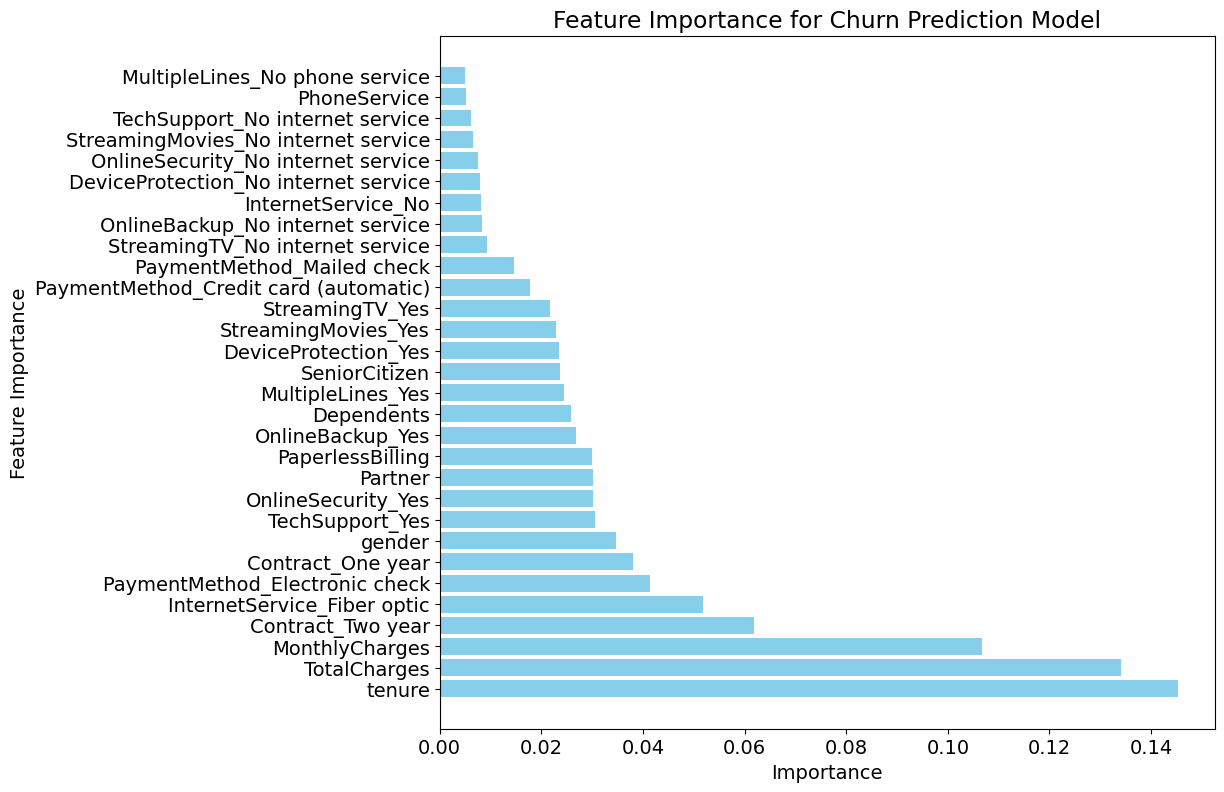

In [14]:
# Plot feature importances
plt.figure(figsize=(10, 9))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.title('Feature Importance for Churn Prediction Model')
plt.xlabel('Importance')
plt.ylabel('Feature Importance')
plt.savefig('../plots/feature_importance.png', bbox_inches='tight', dpi=300)
plt.show()

### Feature Selection

In [12]:
importances_df[importances_df['Importance'] > 0.03]

,Feature,Importance
4,tenure,0.145243
8,TotalCharges,0.134047
7,MonthlyCharges,0.106647
26,Contract_Two year,0.061890
11,InternetService_Fiber optic,0.051920
28,PaymentMethod_Electronic check,0.041343
25,Contract_One year,0.038125
0,gender,0.034618
20,TechSupport_Yes,0.030483
14,OnlineSecurity_Yes,0.030234


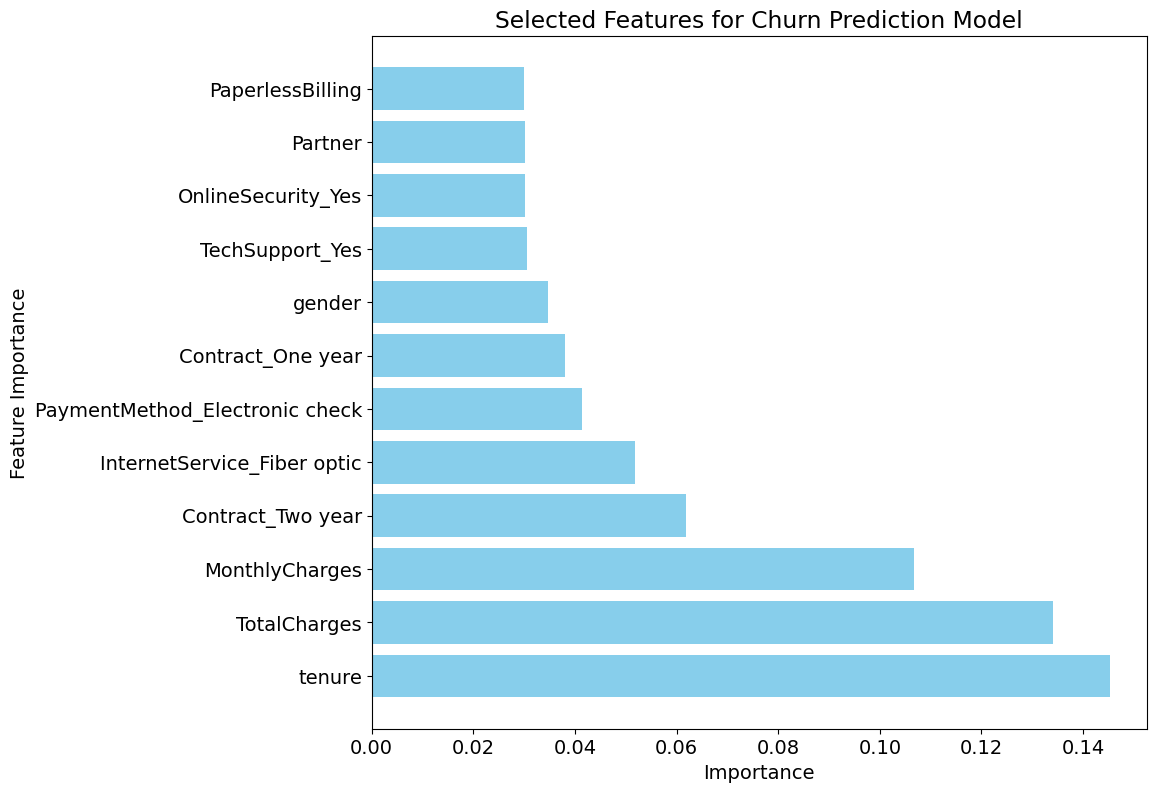

In [17]:
# Plot feature importances
plt.figure(figsize=(10, 9))
plt.barh(importances_df[importances_df['Importance'] > 0.03]['Feature'], importances_df[importances_df['Importance'] > 0.03]['Importance'], color='skyblue')
plt.title('Selected Features for Churn Prediction Model')
plt.xlabel('Importance')
plt.ylabel('Feature Importance')
plt.savefig('../plots/model_feature_importance.png', bbox_inches='tight', dpi=300)
plt.show()

**Feature Importances**

The feature importances from ExtraTreesClassifier along with the graph provide insights into which features are most influential for predicting churn.

1. **High Importance Features:**

    - **tenure:** The length of time a customer stays with the service is the most significant predictor of churn.
    - **TotalCharges and MonthlyCharges:** Higher total and monthly charges tend to influence churn.
    - **Contract_Two year:** Longer contract durations (two-year contracts) correlate with lower churn rates.
    - **InternetService_Fiber optic:** Customers with fiber optic internet service are more likely to churn.
    - **PaymentMethod_Electronic check:** Customers using electronic checks for payments have a higher likelihood of churning.

2. **Lower Importance Features:**

    - Features like `gender`, `SeniorCitizen`, and those related to no internet service (`StreamingTV_No internet service`, `OnlineSecurity_No internet service`, etc.) have lower importance scores.

**Selection of Best Features**

Based on the importance scores, consider selecting features with scores significantly higher than others, particularly those above 0.03, as they are more impactful.

**Selected Features**

- `tenure`
- `TotalCharges`
- `MonthlyCharges`
- `Contract_Two year`
- `InternetService_Fiber optic`
- `PaymentMethod_Electronic check`
- `Contract_One year`
- `gender`
- `TechSupport_Yes`
- `OnlineSecurity_Yes`
- `Partner`
- `PaperlessBilling`

This selection focuses on features that are likely to contribute most effectively to predicting churn.

## Conclusion

Throughout the feature engineering process, identifying tenure, contract types, and payment methods as significant predictors of churn underscores the critical role of customer behavior in telecom services.

As this phase concludes, the insights gleaned and the precision achieved in feature selection, particularly through methods like ExtraTreesClassifier, underscore the crucial nature of rigorous predictive modeling. This experience reaffirms our dedication to constructing models that provide actionable insights, thereby enhancing customer retention strategies and guiding strategic business decisions with greater confidence.